Import relevant libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

keras = tf.keras
from keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [2]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'horses_or_humans',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [3]:
get_label_name = metadata.features['label'].int2str

In [4]:
def format_example(image, label):

  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (160, 160))
  return image, label

In [5]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [6]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [7]:
base_model = keras.applications.MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')

base_model.trainable = False

model = keras.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [8]:
base_learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.fit(train_batches, epochs=4, validation_data=validation_batches)

Epoch 1/4
26/26 [==============================] - 12s 144ms/step - loss: 0.5536 - accuracy: 0.6875 - val_loss: 0.4406 - val_accuracy: 0.8627
Epoch 2/4
26/26 [==============================] - 5s 73ms/step - loss: 0.3901 - accuracy: 0.8606 - val_loss: 0.3419 - val_accuracy: 0.9020
Epoch 3/4
26/26 [==============================] - 5s 73ms/step - loss: 0.3026 - accuracy: 0.9195 - val_loss: 0.2638 - val_accuracy: 0.9412
Epoch 4/4
26/26 [==============================] - 5s 73ms/step - loss: 0.2205 - accuracy: 0.9699 - val_loss: 0.2047 - val_accuracy: 0.9706


In [10]:
model.save("classification_human_horse.h5")
new_model = tf.keras.models.load_model('classification_human_horse.h5')

In [11]:
loss_test, accuracy_test = model.evaluate(test_batches, steps=4)

4/4 [==============================] - 1s 194ms/step - loss: 0.2125 - accuracy: 0.9903


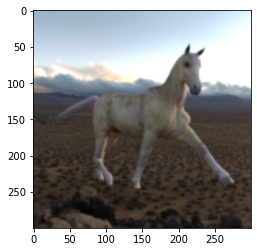

Horse
[-2.932581]
##################################





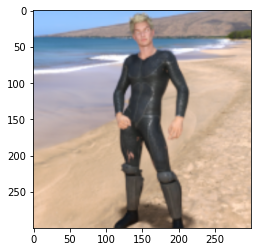

Human
[1.7337462]
##################################





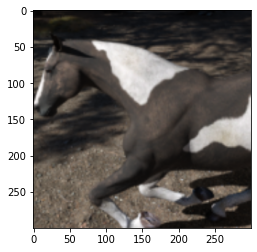

Horse
[-0.60887754]
##################################





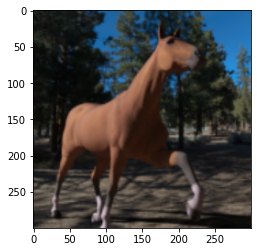

Horse
[-0.893205]
##################################





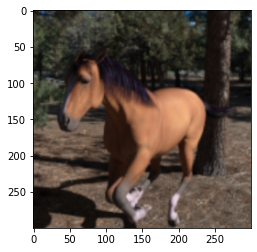

Horse
[-1.4559147]
##################################





In [12]:
result = new_model.predict(test_batches)

for indexImage in range(0, 5):
    for elem in test_batches:
        img = elem[0][indexImage]
        img = tf.image.resize(img, (300, 300))
        img = (img + 1) * 127.5
        img = tf.cast(img, tf.int32)
        break

    plt.figure()
    plt.imshow(img)
    plt.show()

    if result[indexImage] > 0:
        print("Human")
    else:
        print("Horse")
    print(result[indexImage])
    print("##################################\n\n\n")

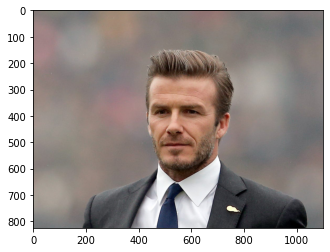

Human
2.1494644
##################################





In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('beckham.jfif')

plt.figure()
plt.imshow(img)
plt.show()

img = tf.cast(img, tf.float32)
img = (img/127.5) - 1
img = tf.image.resize(img, (160, 160))

img = tf.Variable([img], tf.float32)
result = new_model(img)[0][0].numpy()
if result > 0:
    print("Human")
else:
    print("Horse")
print(result)
print("##################################\n\n\n")

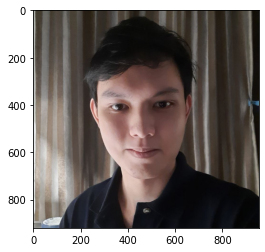

Human
1.6915317
##################################





In [14]:
img = mpimg.imread('test_photo.jpg')

plt.figure()
plt.imshow(img)
plt.show()

img = tf.cast(img, tf.float32)
img = (img/127.5) - 1
img = tf.image.resize(img, (160, 160))

img = tf.Variable([img], tf.float32)
result = new_model(img)[0][0].numpy()
if result > 0:
    print("Human")
else:
    print("Horse")
print(result)
print("##################################\n\n\n")